In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function # for python 2 and 3 compatibility

#### Example source
- T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.
- Chapter 10

#### Data source
* Contains 20,640 observations on housing prices with 9 economic covariates. Appeared in Pace and Barry (1997), "Sparse Spatial Autoregressions", Statistics and Probability Letters.
* http://lib.stat.cmu.edu/datasets/
* to load file : wget http://lib.stat.cmu.edu/datasets/houses.zip

#### Example available on SciKit website :
* http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html#sphx-glr-auto-examples-ensemble-plot-partial-dependence-py

In [3]:
import pandas as pd
import numpy as np

### Load data set and split into Train/Test

In [4]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split # WARNING : needs >0.18 (check with sklearn.__version__)

In [5]:
cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

### Build and Fit model

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

### Convenience plot with partial_dependence_plots

In [8]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D

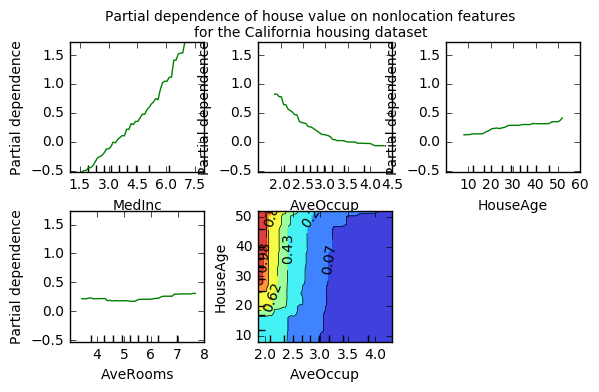

In [9]:
features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

### Custom 3d plot via partial_dependence

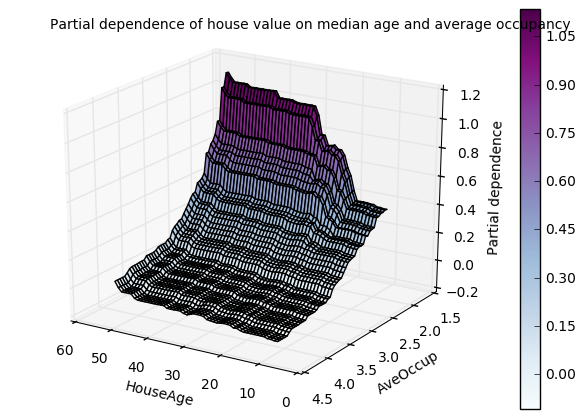

In [10]:
fig = plt.figure()

target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature,
                                   X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median age and '
                 'average occupancy')
plt.subplots_adjust(top=0.9)

#plt.show()